# Solow model with land (måske rettes lidt til)

Imports and set magics:

In [3]:
from __future__ import print_function
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# The standard Solow model

We consider the standard Solow model with a Cobb-Douglas production function: 
$$ Y_t=K_t^{\alpha}(A_tL_t)^{1-\alpha}, 0<\alpha<1 $$

* $Y_t$ is GDP
* $K_t$ is capital 
* $L_t$ is labor 
 * growing with a constant rate of $n$: $L_{t+1}=(1+n)L_t, n\geq0$
* $A_t$ is technology 
 * growing with a constant rate of $g$: $A_{t+1}=(1+g)A_t, g\geq0$ 





Saving is a constant fraction of GDP

$$ 
S_t = sY_t, 0<s<1
$$

such that capital accumulation is savings and undepreciated capital: 

$$
K_{t+1}=S_t+(1-\delta)K_t, 0<\delta<1
$$


We define the technology adjusted capital-labour ratio as 

$$\tilde{ k_{t+1}}=\frac{K_{t+1}}{L_{t+1}A_{t+1}} $$

The transition equation becomes:
$$
\tilde{k_{t+1}}=\frac{1}{(1+n)(1+g)}*(s\tilde{k_t^\alpha}+(1-\delta)\tilde{k_t})
$$

We know that steady state requires $k_{t+1}=k_t$

# SOLVE MED SYMPY

## Graphical analysis 

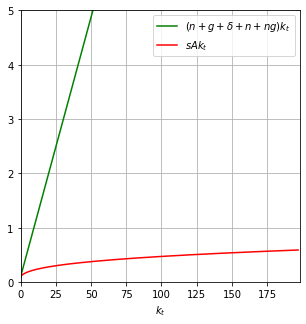

In [7]:
# a. create function for generating solow diagram
def solow(c,alpha,delta,s,n,g):
    '''Function for creating the solow diagram

    input:
    c = capital
    alpha = 
    delta = deprication of capital
    s = rate of saving
    n = population growth 
    g = technologic growth

    output:
    Depriciation of capital 
    Kapital growth
    '''
    #i. create empty lists
    Deprication = []
    Capital = []

    # ii. create loop which adds values for deprication of capital
    for c in range(1,c):
        Deprication.append((n+g+delta+n*g)*c)
    
    # iii. create loop which adds values for growth of capital
    for c in range(1,c):
        Capital.append(s*(c**alpha))
    
    # iv. plot in figure 
    plt.figure(figsize=(5,5))
    plt.plot(Deprication, label = '$(n+g+\delta+n+ng)k_t$', color = 'g')
    plt.plot(Capital, label = '$sAk_t$', color = 'r')
    plt.grid(True)
    plt.ylim(0,5)
    plt.xlim(0,c)
    plt.xlabel('$k_t$')
    plt.legend()
    plt.legend()
    return plt.show()

# b. call function with fixed parameters
solow(200,1/3,0.05,0.101,0.025,0.02)


We choose to create an interactive version of the above figure where it is possible to change the deprication, saving, population - and technologic growth

In [8]:
widgets.interact(solow,
    c = widgets.fixed(200),
    alpha = widgets.fixed(1/3), 
    delta = widgets.FloatSlider(description = 'd' , min = 0.01, max = 0.1, step=0.01, value=0.05), 
    s = widgets.FloatSlider(description = 's', min=0.1, max=0.9, step = 0.1, value= 0.1),  
    n = widgets.FloatSlider(description = 'n', min = 0.01, max = 0.1, step = 0.01, value = 0.025),
    g = widgets.FloatSlider(description = 'g', min = 0.01, max = 0.1, step = 0.01, value = 0.02))

interactive(children=(FloatSlider(value=0.05, description='d', max=0.1, min=0.01, step=0.01), FloatSlider(valu…

<function __main__.solow(c, alpha, delta, s, n, g)>

skriv noget her Ring. Bare hvad der sker når man rykker de forskellige parameter. Find noget i slides

# Model extension

We consider the Solow model with land. 

We assume the production function is Cobb-Douglas: 
$$Y_t=K_t^{\alpha}(A_tL_t)^{\beta}X^{\kappa}, \alpha>0, \beta>0, \kappa>0, \alpha+\beta+\kappa=1$$
where: 
* $Y_t$ is GDP
* $K_t$ is capital 
* $L_t$ is labor 
 * growing with a constant rate of $n$: $L_{t+1}=(1+n)L_t, n\geq0$
* $A_t$ is technology 
 * growing with a constant rate of $g$: $A_{t+1}=(1+g)A_t, g\geq0$
* $X$ is land
 * constant

Saving is a constant fraction of GDP

$$ 
S_t = sY_t,\,s\in(0,1)
$$

such that capital accumulation is savings and undepreciated capital: 

$$
K_{t+1}=S_t+(1-\delta)K_t, 0<\delta<1
$$

We assume that economy converges towards a steady state in which the capital-output ratio is constant: 
$$
z_t=\frac{K_t}{Y_t}=\frac{k_t}{y_t}
$$

The trasition equation is:
$$
z_{t+1}=\frac{1}{((1+g)(1+n))^\beta} [s+z_t(1-\delta)]^{1-\alpha}z_t^{\alpha}
$$

# Steady state
First we define the sympy symbols:

In [9]:
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
beta = sm.symbols('beta')
kappa = sm.symbols('kappa')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')
z = sm.symbols('z')

## Analytical solution
We define the steady state equation: 

In [10]:
ss = sm.Eq(z, s/((((1+n)*(1+g))**(beta/(beta+kappa)))-(1-delta))) #Turns SS into a sympy equation
kss = sm.solve(ss,z)[0] #Solve it by sympy
ss_func = sm.lambdify((s,g,n,beta,kappa,delta),kss) # Turns it into a Python function

We call the function for given parameters: 

In [11]:
ss_func(0.2, 0.02,0.01,0.6,0.2,0.2)

0.898611650294858

Skriv måske noget her

## Numerical analysis
If we rewrite the transition equation it clearly becomes a root-finding problem: 

$$
0=\frac{1}{((1+g)(1+n))^\beta} [s+z*(1-\delta)]^{1-\alpha}z*^{\alpha}-z*
$$

In [12]:
# We state the plausible values
s = 0.2
g = 0.02
n = 0.01
alpha = 0.2
beta = 0.6
delta = 0.2
kappa = 0.2

To solve we need an objective function: 

In [14]:
obj_zss = lambda z: z - ((s + z*(1-delta))**(1-alpha)*z**alpha)/(((1+n)*(1+g))**beta)
interval = [0.1,100]

Using Brentq we find the optimal level of capital-output ratio for given parameters:

In [15]:
res  = optimize.root_scalar(obj_zss,bracket=interval,method='brentq')
print(res)

converged: True
           flag: 'converged'
 function_calls: 8
     iterations: 7
           root: 0.8986116502948581


We call the two solutions and compare: 

In [16]:
print(f'analytical solution is: {ss_func(s,g,n,beta,kappa,delta):.3f}')
print(f'numerical solution is: {res.root:.3f}')

analytical solution is: 0.899
numerical solution is: 0.899


As we can see the solutions are identical with 3 decimals. (Tilføj måske noget her om iterations mm.)

We want to analyze capital-ratio output over time so we create the following function:

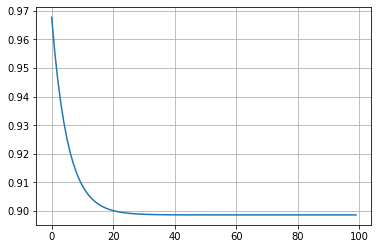

In [21]:
# a. generate function for transition equation for the capital-output ratio
def trans_eq(Z0,alpha,beta,delta,s,g,n,t):

    '''Function creates an interactive plot based on the transition equation 
    
    input:
    Z0 = capital-ratio output in first period
    alpha = ...
    beta = ...
    delta = deprication
    s = rate of saving
    g = technology growth
    n = population growth
    t = periods
    
    output:
    Z_t1 = capital-ratio output in next period

    '''

    # i. create two empty list 
    Z_t = [Z0] # contains capital-output ratio in first period 
    Z_t1 = []

    i = 1

    # ii. create a loop which generates two lists for both z_t1 and z_t
    while i <= t:
        Z_t.append(((s+Z_t[-1]*(1-delta))**(1-alpha)*Z_t[-1]**alpha)/(((1+n)*(1+g))**beta)) # Adds to list for z_t
        Z_t1.append(((s+Z_t[-1]*(1-delta))**(1-alpha)*Z_t[-1]**alpha)/(((1+n)*(1+g))**beta)) # Adds to list for z_t1

        i += 1

    # iii. generate plot 
    plt.plot(Z_t1)
    plt.grid(True)
    return plt.show()

# b. call function
trans_eq(1,alpha,beta,delta,s,g,n,100)

# Model description

> **Note:** If you are not that friendly with markdown and latex you can refer to an external document with the model description instead.

We consider the **standard Solow-model** where:

1. $K_t$ is capital
* $L_t$ is labor (growing with a constant rate of $n$)
* $A_t$ is technology (growing with a constant rate of $g$)
* $Y_t = F(K_t,A_tL_t)$ is GDP

**Saving** is a constant fraction of GDP

$$ S_t = sY_t,\,s\in(0,1) $$

such that **capital accumulates** according to

$$ K_{t+1}=S_{t}+(1-\delta)K_{t}=sF(K_{t},A_{t}L_{t})+(1-\delta)K_{t}, \delta \in (0,1) $$

The **production function** has **constant-return to scale** such that

$$ \frac{Y_{t}}{A_{t}L_{t}}=\frac{F(K_{t},A_{t}L_{t})}{A_{t}L_{t}}=F(\tilde{k}_{t},1)\equiv f(\tilde{k}_{t}) $$

where $\tilde{k}_t = \frac{K_t}{A_{t}L_{t}}$ is the technology adjusted capital-labor ratio.

The **transition equation** then becomes

$$ \tilde{k}_{t+1}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}_{t})+(1-\delta)\tilde{k}_{t}] $$

We assume the **production function** is **Cobb-Douglas** so

$$ F(K_{t},A_{t}L_{t})=K_{t}^{\alpha}(A_{t}L_{t})^{1-\alpha}\Rightarrow f(\tilde{k}_{t})=\tilde{k}_{t}^{\alpha} $$

# Steady state

## Analytical solution

We can use **sympy** to find an analytical expression for the steady state, i.e. solve

$$ \tilde{k}^{\ast}= \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] $$

First we define all **symbols**:

In [2]:
k = sm.symbols('k')
alpha = sm.symbols('alpha')
delta = sm.symbols('delta')
s = sm.symbols('s')
g = sm.symbols('g')
n = sm.symbols('n')

Then we define the **steady state equation**

In [3]:
ss = sm.Eq(k,(s*k**alpha+(1-delta)*k)/((1+n)*(1+g)))

and **solve** it

In [4]:
kss = sm.solve(ss,k)[0]
kss

((delta + g*n + g + n)/s)**(1/(alpha - 1))

For later use, we turn the solution into a **Python funciton**

In [5]:
ss_func = sm.lambdify((s,g,n,alpha,delta),kss)

## Numerical solution

We can re-write the equation for the steady state capital per capita as

\\[ 0 = \frac{1}{(1+n)(1+g)}[sf(\tilde{k}^{\ast})+(1-\delta)\tilde{k}^{\ast}] - \tilde{k}^{\ast} \\]

whereby it clearly becomes a **root-finding problem**. Such a problem can be solved by a **bisection method**.

Define the model **parameters**:

In [6]:
s = 0.2
g = 0.02
n = 0.01
alpha = 1/3
delta = 0.1

**Solve numerically** for the steady state:

In [7]:
solution = modelproject.solve_for_ss(s,g,n,alpha,delta)

print(f'analytical solution is: {ss_func(s,g,n,alpha,delta):.3f}')
print(f' numerical solution is: {solution.root:.3f}')

analytical solution is: 1.904
 numerical solution is: 1.904


# Further analysis

ADD FURTHER ANALYSIS, VISUALIZATIONS AND EXTENSIONS.

# Conclusion

ADD CONCISE CONCLUSION.